# Kryptografia z kluczem tajnym (symetryczna): szyfry strumieniowe
### Literatura:
1. Nowoczesna kryptografia, Aumasson
2. Kryptografia dla praktyków, Schneier

### Historia szyfrów strumieniowych
1. Zapoznaj się z działaniem szyfrem Vernama 
2. Szyfr Vernama jako szyfr doskonały 
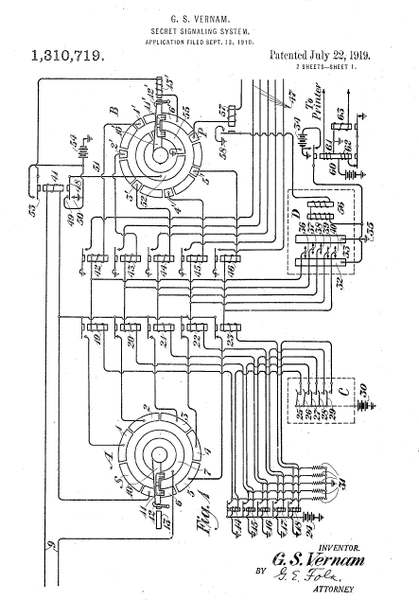

#### Funkcje pomocnicze
Zadaniem poniższego zestawu funkcji jest zamiana wiadomości tekstowej (poprzez kody ASCII) do (tekstowego) ciągu 0 i 1. Chcemy analizować funkcje tak jak są one opisane w książkach.


In [1]:
# Funkcje pomocnicze 
from textwrap import wrap
import math 
from codecs import encode

#tablica znaków w tablicę kodów int
def intoASCIIArray(message: str):
    int_array = []
    mesg_array = list(message) 
    for i in mesg_array:
        int_array.append(ord(i))
    return int_array

#tablica kodów int w tablice znaków 
def intoCharArray(message: []):
    mesg_char = []
    for i in message:
        mesg_char.append(chr(i))
    return mesg_char

# jak wyświetlić dane w postaci binarnej na n bitach 
get_bin = lambda x, n: format(x, 'b').zfill(n)

#tekst ascii w postaci tablicy 8-bitowych porcji
def ASCIIToBinChunks(message_list):
    binary = []
    for x in message_list: 
        binary.append(get_bin(x, 8))
    return binary
#tekst ascii w formie strumienia bitów 
def ASCIIToBinStream(binary: []):
    binary_str = ""
    for x in binary:
        binary_str+=x 
    return binary_str


# Przykłady

# Liczba 200 w zapisie binarnym 
l = 200
bl = get_bin(l,8)
print("Liczba 200 w zapisie binarnym na 8 bitach:", bl)
bl = get_bin(l,16)
print("Liczba 200 w zapisie binarnym na 16 bitach:", bl)


messageTxt = 'The quick brown fox jumps over the lazy dog'
messageASCII = intoASCIIArray(messageTxt)
print("Tekst w formie kodów ASCII: ",messageASCII)
messageASCIIBinChunks = ASCIIToBinChunks(messageASCII)
print("Tekst w formie porcji bitów:", messageASCIIBinChunks)
messageASCIIBinStream = ASCIIToBinStream(messageASCIIBinChunks) 
print("Tekst w postaci ciągu 0 i 1:", messageASCIIBinStream)
print()        


#Operatory logiczne działające na napisach bitów 
def XOR(bits1,bits2):
    """perform a XOR operation and return the output"""
    xor_result = ""
    for index in range(len(bits1)):
        if bits1[index] == bits2[index]: 
            xor_result += '0'
        else:
            xor_result += '1'
    return xor_result  

def AND(bits1,bits2):
    """perform a AND operation and return the output"""
    and_result = ""
    for index in range(len(bits1)):
        if (bits1[index] == '1') and  (bits2[index] == '1'): 
            and_result += '1'
        else:
            and_result += '0'
    return and_result  

def OR(bits1,bits2):
    """perform a OR operation and return the output"""
    or_result = ""
    for index in range(len(bits1)):
        if (bits1[index] == '0') and  (bits2[index] == '0'): 
            or_result += '0'
        else:
            or_result += '1'
    return or_result  

def NEG(bits):
    """perform a NEG operation and return the output"""
    neg_result = ""
    for index in range(len(bits)):
        if (bits[index] == '0'): 
            neg_result += '1'
        else:
            neg_result += '0'
    return neg_result  

print("AND", AND('0101010001101', '0101010001100'))    
print("OR", OR('0101010001101', '0101010001100')) 
print("XOR", XOR('0101010001101', '0101010001100')) 
print("NEG", NEG('0101010001101')) 

Liczba 200 w zapisie binarnym na 8 bitach: 11001000
Liczba 200 w zapisie binarnym na 16 bitach: 0000000011001000
Tekst w formie kodów ASCII:  [84, 104, 101, 32, 113, 117, 105, 99, 107, 32, 98, 114, 111, 119, 110, 32, 102, 111, 120, 32, 106, 117, 109, 112, 115, 32, 111, 118, 101, 114, 32, 116, 104, 101, 32, 108, 97, 122, 121, 32, 100, 111, 103]
Tekst w formie porcji bitów: ['01010100', '01101000', '01100101', '00100000', '01110001', '01110101', '01101001', '01100011', '01101011', '00100000', '01100010', '01110010', '01101111', '01110111', '01101110', '00100000', '01100110', '01101111', '01111000', '00100000', '01101010', '01110101', '01101101', '01110000', '01110011', '00100000', '01101111', '01110110', '01100101', '01110010', '00100000', '01110100', '01101000', '01100101', '00100000', '01101100', '01100001', '01111010', '01111001', '00100000', '01100100', '01101111', '01100111']
Tekst w postaci ciągu 0 i 1: 0101010001101000011001010010000001110001011101010110100101100011011010110010000

In [2]:
# Generowanie losowych danych: funkcje i algorytmy pomocnicze 
import random
random.seed("key")  #generator PRNG w python można inicjalizować tekstem

# jak wygenerować 8 losowych bitów (razy n)
def randomBytes(n):
    return bytes(random.getrandbits(8) for i in range(n))

def randomByte():
    return random.randint(0,255)

def randomByteBin():
    return get_bin(random.randint(0,255),8)

#jak wygenerować ciąg losowych bajtów
random_stream_chunks = []
for i in range(8):
    random_stream_chunks.append(randomByteBin())

print("Losowe bajty:", random_stream_chunks)
    
randomBinaryString = ""    
for i in random_stream_chunks:
    randomBinaryString+=i

print("Strumień bitów:", randomBinaryString)
    
print("Pojedyncze losowe bajty:", end="")
bits1 = randomByteBin()
bits2 = get_bin(randomByte(),8)
print(bits1, bits2)

Losowe bajty: ['10001110', '11111000', '11000111', '11110101', '11101100', '01010100', '00111110', '10011110']
Strumień bitów: 1000111011111000110001111111010111101100010101000011111010011110
Pojedyncze losowe bajty:10000110 00000010


### Zadanie samodzielne dla studentów
Zaimplementuj szyfr, który utajnia strumień wiadomości jawnej przez łączenie go z pseudolosowym strumieniem 


In [3]:
s='''Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc eget augue eget sem sodales ultrices. Quisque dapibus, urna sit amet.'''
%store s >plaintext.txt
h = open("plaintext.txt", "r")

random.seed("key")


# ciphertext = [] 
# tu wpisz swoj kod
str_bit = ASCIIToBinStream(ASCIIToBinChunks(intoASCIIArray(s)))

random_bits = ""
for i in range(len(str_bit)):
    random_bits += str(i % 2)

print(str_bit)
print(random_bits)

ciphertext = XOR(random_bits, str_bit)


print(ciphertext)

Writing 's' (str) to file 'plaintext.txt'.
010011000110111101110010011001010110110100100000011010010111000001110011011101010110110100100000011001000110111101101100011011110111001000100000011100110110100101110100001000000110000101101101011001010111010000101100001000000110001101101111011011100111001101100101011000110111010001100101011101000111010101110010001000000110000101100100011010010111000001101001011100110110001101101001011011100110011100100000011001010110110001101001011101000010111000100000010011100111010101101110011000110010000001100101011001110110010101110100001000000110000101110101011001110111010101100101001000000110010101100111011001010111010000100000011100110110010101101101001000000111001101101111011001000110000101101100011001010111001100100000011101010110110001110100011100100110100101100011011001010111001100101110001000000101000101110101011010010111001101110001011101010110010100100000011001000110000101110000011010010110001001110101011100110010110000100000011101010111001001101

### Zastanów się
1. W jaki sposób łączymy strumień tekstu jawnego i strumień klucza? Wady i zalety różnych metod.

### Linear congruential generators (LCG)
Generatory liniowe kongruentne sa najprostszymi generatorami dającymi ciągi liczb o dobrych własnościach statystycznych. Kolejne wyrazy ciągu generowane sa przy pomocy formuły:

$z_{i+1}=(a\cdot z_i+c)\bmod m$

Wyraz $z_0$ nazywany jest ziarnem (_seed_). Użycie tego samego ziarna gwarantuje nam wyprodukowanie tej samej sekwencji liczb.

Charakterystyczną cechą GLK jest ich okresowość. Oczekujemy możliwie najdłuższego okresu (maksymalny to $m-1$). Najdłuższy okres otrzymamy gdy spełnione są pewne warunki (twierdzenie Hull'a-Dobell'a):

- $c$ i $m$ są względnie pierwsze, 
- $a-1$ jest podzielne przez wszystkiem pierwsze czynniki $m$,
- $a-1$ jest wielokrotnoścą 4 jeśli $m$ jest wielokrotnością 4.

Przykładowe dobre wartości to $a=1103515245$, $c=12345$ dla $m=2^{31}$ 

Zazwyczaj generator zwraca wartość $\frac{z_i}{m}$, ale wyjście można przeskalować do dowolnej innej wartości. 

Obecnie większość PRNG to tzw. _Mersenne twister_, ale ogólna idea ich użytkowania i własności jest taka sama jak w przypadku generatorów kongruentnych. 

In [4]:
def lcg(x, a, c, m):
    while True:
        x = (a * x + c) % m
        yield x
        
def random_uniform_sample(n, interval, seed=0):
    a, c, m = 1103515245, 12345, 2 ** 31
    bsdrand = lcg(seed, a, c, m)

    lower, upper = interval[0], interval[1]
    sample = []

    for i in range(n):
        observation = (upper - lower) * (next(bsdrand) / (2 ** 31 - 1)) + lower
        sample.append(round(observation))

    return sample

print(random_uniform_sample(100, [0,255],11))

[166, 97, 88, 33, 91, 184, 211, 119, 189, 205, 46, 8, 82, 18, 98, 253, 139, 27, 203, 49, 203, 44, 215, 76, 5, 204, 67, 84, 70, 232, 23, 190, 31, 114, 226, 213, 33, 239, 96, 162, 104, 13, 14, 12, 112, 126, 219, 108, 23, 86, 124, 87, 47, 36, 130, 187, 97, 233, 206, 39, 210, 88, 112, 86, 72, 72, 144, 215, 63, 238, 132, 236, 182, 191, 142, 108, 23, 115, 119, 207, 4, 53, 145, 53, 114, 93, 60, 125, 219, 199, 126, 74, 236, 39, 212, 15, 121, 91, 202, 235]


### Zastanów sie
1. Dlaczego stosowanie generatorów PRNG jako źródłą strumienia klucza to zły pomysł?

### Kryptograficzne generatory PRNG
Urządzenie /dev/urandom stanowi podstawę dobrego generatora CPRNG

In [5]:
import os
import struct

# random integer using os.urandom()
print(struct.unpack('i', os.urandom(4)))
# Output (258871565,)

# unsigned random integer using os.urandom()
print(struct.unpack('I', os.urandom(4)))
print(struct.unpack('I', os.urandom(4))[0] % 100)
# Output (1015967885,)

# random short number using os.urandom()
print(struct.unpack('h', os.urandom(2)))
# Output (-28882,)

# unsigned random short using os.urandom()
print(struct.unpack('H', os.urandom(2)))
# Output (29492,)

# Print random float using os.urandom()
print(struct.unpack('f', os.urandom(4)))
# Output (-4.651611836498911e+20,)

# un-singed random decimal using os.urandom()
print(struct.unpack('d', os.urandom(8)))
# Output (-1.7024488468332834e-120,)

# random char using os.urandom()
print(struct.unpack('c', os.urandom(1)))
# Output (b'\xce',)

(930213996,)
(927448174,)
97
(22222,)
(60949,)
(-1.6722506706583552e+18,)
(-2.50536581243131e-211,)
(b'\xeb',)


### Zastanów się: 
1. Poszukaj informacji o szyfrach binarnie addytywnych 
2. Poszukaj informacji o szyfrach strumieniowych używanych w praktyce. Gdzie takie szyfry mogą być obecnie stosowane? 

### Problem 
Utwórz dwie różne wiadomości równej długości. Zaszyfruj je szyfrem XOR z użyciem tego samego klucza. Wyznacz alternatywę rozłączną szyfrogramów (XOR) i porównaj ją z tą samą operacją wykonaną dla tekstów jawnych.  

In [6]:
message1 = 'secret'
message2 = 'poufny'

key = 'keykey'
mes_1_bin_stream = ASCIIToBinStream(ASCIIToBinChunks(intoASCIIArray(message1)))
mes_2_bin_stream = ASCIIToBinStream(ASCIIToBinChunks(intoASCIIArray(message2)))

key_bin_stream = ASCIIToBinStream(ASCIIToBinChunks(intoASCIIArray(key)))

encr_1 = XOR(mes_1_bin_stream, key_bin_stream)
encr_2 = XOR(mes_2_bin_stream, key_bin_stream)

encr_1_2_xor = XOR(encr_1, encr_2)

plain_texts_xor = XOR(mes_1_bin_stream, mes_2_bin_stream)

print("encr_1_2_xor   :", encr_1_2_xor)
print("plain_texts_xor:", plain_texts_xor)


encr_1_2_xor   : 000000110000101000010110000101000000101100001101
plain_texts_xor: 000000110000101000010110000101000000101100001101


### Bezpieczeństwo szyfru XOR
1. Jakie znaczenie ma powyższy wynik z punktu widzenia kryptoanalizy? 
2. Jeśli OTP to OK.
3. Na czym polega atak ze znanym tekstem jawnym?

### Problem

1. Utwórz dowolną wiadomość $M_1$. 
2. Zaszyfruj ją swoim szyfrem XOR z kluczem $K$. 
3. Wykonaj na szyfrogramie $C_1$ operację $C_2 = C_1 \oplus (111\ldots1)$. 
4. Odszyfruj wiadomość $C_2$ stosując ten sam klucz $K$. 
5. Porównaj wiadomości: $M_1$ i odszyfrowaną w poprzednim kroku $M_2$ (najlepiej binarnie).  

In [7]:
m1 = '10110101' # len = 8
key = '01101011'
ciphertext_m1 = XOR(key, m1)

ciphertext_2 = XOR(ciphertext_m1, '11111111')
m2 = XOR(ciphertext_2, key)

print(m1)
print(m2)





10110101
01001010
